# Selecting target sources from GAIA DR2
### https://ui.adsabs.harvard.edu/abs/2018A%26A...620A.128V/abstract

In [1]:
#### Conda environment
## environment terada2019
# conda create --name terada2019 python=3.7
# pip install --upgrade pip
# pip install astropy scipy
# pip install photutils
# pip install jupyter matplotlib h5py aplpy pyregion PyAVM healpy
# pip install astroquery
# pip install pandas
# pip install -U statsmodels
# pip install -U scikit-learn

In [2]:
import os
import sys
import time
sys.path
sys.path.append('./')

import numpy as np
from astropy import units as u
from astropy.io import fits
from astropy import coordinates
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from astroquery.alma import Alma
alma = Alma()
%matplotlib inline

In [3]:
!ls

asu.fits  gaiaHerbig.ipynb  test.pdf


In [4]:
# Loading FITS table
inFITS = 'asu.fits'
hdul = fits.open(inFITS)

hdul.fileinfo(0)

print( "number of tables: ", len(hdul) )

number of tables:  2


In [5]:
# print headers

for index in range(0, len(hdul) ):
    print( '#############   TABLE ' + str(index) + '   ##############' )
    hdr = hdul[index].header
    print( repr(hdr) )

#############   TABLE 0   ##############
SIMPLE  =                    T / Standard FITS Format                           
BITPIX  =                    8 / Character data                                 
NAXIS   =                    0 / No Image --- just extension(s)                 
EXTEND  =                    T / There are standard extensions                  
ORIGIN  = 'xml2fits_v1.95'     / Converted from XML-Astrores to FITS            
                         e-mail: question@simbad.u-strasbg.fr                   
COMMENT  ARG='-rm'                                                              
LONGSTRN= 'OGIP 1.0'           / Long string convention (&/CONTINUE) may be used
DATE    = '2020-03-19'         / Written on 2020-03-19:04:48:06 (GMT)           
                             by: apache@vizier.u-strasbg.fr                     
         **********************************************************             
             EXCERPT from catalogues stored in VizieR (CDS)         

In [6]:
# list keys
datatab_id = 1
list( hdul[datatab_id].header.keys() )

['XTENSION',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'PCOUNT',
 'GCOUNT',
 'TFIELDS',
 'CDS-CAT',
 '',
 'EXTNAME',
 'CDS-NAME',
 '',
 '',
 'UCD__1',
 'TDISP1',
 'TFORM1',
 'TTYPE1',
 'UCD__2',
 'TDISP2',
 'TFORM2',
 'TTYPE2',
 '',
 'TUNIT2',
 'UCD__3',
 'TDISP3',
 'TFORM3',
 'TTYPE3',
 '',
 'TUNIT3',
 'UCD__4',
 'TDISP4',
 'TFORM4',
 'TTYPE4',
 'TUNIT4',
 'UCD__5',
 'TDISP5',
 'TFORM5',
 'TTYPE5',
 '',
 'TUNIT5',
 'UCD__6',
 'TDISP6',
 'TFORM6',
 'TTYPE6',
 'TUNIT6',
 'UCD__7',
 'TDISP7',
 'TFORM7',
 'TTYPE7',
 'TUNIT7',
 'UCD__8',
 'TDISP8',
 'TFORM8',
 'TTYPE8',
 'TUNIT8',
 'UCD__9',
 'TDISP9',
 'TFORM9',
 'TTYPE9',
 'TUNIT9',
 'UCD__10',
 'TDISP10',
 'TFORM10',
 'TTYPE10',
 '',
 'UCD__11',
 'TDISP11',
 'TFORM11',
 'TTYPE11',
 '',
 'UCD__12',
 'TDISP12',
 'TFORM12',
 'TTYPE12',
 '',
 'UCD__13',
 'TDISP13',
 'TFORM13',
 'TTYPE13',
 '',
 'TUNIT13',
 'UCD__14',
 'TDISP14',
 'TFORM14',
 'TTYPE14',
 '',
 'UCD__15',
 'TDISP15',
 'TFORM15',
 'TTYPE15',
 '',
 'UCD__16',
 'TDISP16',
 'TFO

In [7]:
# loading data into python structures
datatab_id = 1
num_AllSC = hdul[datatab_id].header['naxis2'] 

data = hdul[datatab_id].data
data.shape

# Listing available columns
hdul[1].columns

#print('###########')
#print( hdul[1].columns.names )

ColDefs(
    name = 'Name'; format = '13A'; disp = 'A13'
    name = 'RAICRS'; format = 'D'; unit = 'deg'; disp = 'F10.4'
    name = 'DEICRS'; format = 'D'; unit = 'deg'; disp = 'F9.4'
    name = 'plx'; format = 'D'; unit = 'mas'; disp = 'F9.6'
    name = 'Dist'; format = 'E'; unit = 'pc'; disp = 'F6.1'
    name = 'Teff'; format = 'J'; unit = 'K'; disp = 'I5'
    name = 'LogL'; format = 'E'; unit = '[Lsun]'; disp = 'F5.2'
    name = 'Av'; format = 'E'; unit = 'mag'; disp = 'F6.3'
    name = 'V'; format = 'E'; unit = 'mag'; disp = 'F5.2'
    name = 'Bin'; format = '3A'; disp = 'A3'
    name = 'E_NIR_'; format = 'E'; disp = 'E10.3'
    name = 'E_MIR_'; format = 'E'; disp = 'E10.3'
    name = 'EWHa'; format = 'D'; unit = '0.1nm'; disp = 'F8.3'
    name = 'Hashape'; format = 'A'; disp = 'A1'
    name = 'Vi'; format = 'E'; disp = 'F5.2'
    name = 'UXOR'; format = '3A'; disp = 'A3'
    name = 'Mass'; format = 'E'; unit = 'Msun'; disp = 'F6.3'
    name = 'Age'; format = 'E'; unit = 'Myr'; dis

### Constructing selection criteria

In [8]:
mass = data['Mass']
mass_mask = (mass > 2.0) & (mass < 7.0)

distance = data['dist']
distance_mask = (distance < 450.0)

dec = data['DEICRS']
dec_mask = (dec > -65.0) & (dec < 20.0)

name = data['Name']
name_mask = (name != 'HD 50138' )

nirexcess = data['E_NIR_']
nir_mask  = ( np.isnan(nirexcess) == False )

firexcess = data['E_MIR_']
fir_mask  = ( np.isnan(firexcess) == False )

mask = mass_mask & distance_mask & dec_mask & name_mask & nir_mask & fir_mask
print('Number of selected sources : ', len(mask[mask == True] ) )

Number of selected sources :  19


### Print the properties of the selected sources

In [9]:
### Comments:
#### HD 176386 (CrA-54) is a source very close to TY CrA. [Need to re-observe.]
#### Good to present Spitzer image for TY CrA and HD 17386
#### see https://ui.adsabs.harvard.edu/abs/2011ApJ...736..137S/abstract
#### TY CrA: 0.91 mJy at 225 GHz; HD 176385: 0.48 mJy at 225 GHz

#### HD 50138 appears to be an AGB star [Need to remove.]

#### HR 5999 is Lupus III 53 (V856 Sco or Sz 108), 55.81 mJy at 345 GHz from Lupus survey
#### (1.2 minute per target for Lupus survey)
#### which was observed with ~0.22 arcsecond resolution [Need to re-observe.]

In [10]:
ra_array  = []
dec_array = []

for index in range(0, len(mask) ):
    if mask[index] == True:
        c = SkyCoord(ra=data['RAICRS'][index]*u.degree, 
                     dec=data['DEICRS'][index]*u.degree, 
                     frame='icrs')
        c_string = c.to_string('hmsdms')
        ra_array.append( data['RAICRS'][index] )
        dec_array.append( data['DEICRS'][index] )
        
        print( index,
               data['Name'][index], 
               c_string, 
               #round(data['RAICRS'][index],7), 
               #round(data['DEICRS'][index],7), 
               round(data['Dist'][index],1),
               round(data['Mass'][index],0),
               round(data['Teff'][index],0),
               round(10.0**(data['LogL'][index]), 0),
               data['E_NIR_'][index],
               data['E_MIR_'][index]
             )
        
        # checking duplication
        coord = coordinates.SkyCoord(
                                     data['RAICRS'][index]*u.deg, data['DEICRS'][index]*u.deg, 
                                     frame = 'fk5'
                                    )
        result = alma.query_region(coord, radius = (10.0 / 3600.0)*u.deg )
        print('Num of archival ALMA observations : ', len(result) , '\n')

10 CO Ori 05h27m38.3s +11d25m39s 404.0 3.0 6250 32.0 0.3109 0.1735
Num of archival ALMA observations :  0 

29 HD 101412 11h39m44.4s -60d10m28s 411.3 2.0 9750 38.0 0.1029 0.1839
Num of archival ALMA observations :  0 

43 HD 149914 16h38m28.6s -18d13m14s 158.8 3.0 10250 123.0 0.01343 0.001259
Num of archival ALMA observations :  0 

46 HD 158643 17h31m25s -23d57m46s 122.8 3.0 9800 166.0 0.01646 0.02269
Num of archival ALMA observations :  0 

49 HD 17081 02h44m07.3s -13d51m32s 106.7 4.0 13000 380.0 0.001977 0.000214
Num of archival ALMA observations :  0 

52 HD 179218 19h11m11.3s +15d47m15s 266.0 3.0 9500 112.0 0.0383 0.1611
Num of archival ALMA observations :  0 

68 HD 290770 05h37m02.4s -01d37m21s 399.1 2.0 10500 33.0 0.1524 0.1365
Num of archival ALMA observations :  0 

78 HD 35929 05h27m42.8s -08d19m39s 387.4 3.0 7000 62.0 0.0737 0.04267
Num of archival ALMA observations :  0 

87 HD 37806 05h41m02.3s -02d43m01s 427.6 3.0 10475 148.0 0.1866 0.2004
Num of archival ALMA observatio

### Grouping into SGs

In [11]:
class data_group:
    '''
    
    Class for storing a group of (arbitrary) data as a list of "list of same shape", 
    and the links connecting the data points in a minimum spanning tree fashion.
    Each link is defined by the indices of the two connected data points in the list.
    All links are stored in a list.
    
    '''
    
    def __init__(self, index=0):
        """
        
        Keyword
        
        index [integer] : an optional index to be given to the group (default: 0)
        
        """
        self.index  = index
        self.data    = []
        self.links   = []
    
    
    def __del__(self):
        pass    
    
    
    def load_data(self):
        pass
    
    
    
    ### Internal functions ###############################################################
    ######################################################################################
    
    def get_links(self, id_list):
        '''
        
        Return the links which are connected to the data points at the input indices.
        
        Input
        
        id_list [ilist of nteger] : the index of the data point to search for links
        
        Return
        
        links [a list of two-elements integer lists] : links that are connected with the
                                                       data points at the input indices
        
        '''
        
        links = []
        
        for group_member_id in id_list:
            for link in self.links:
                if ( 
                    (group_member_id in link)
                    and
                    (link not in links)                   
                   ):
                    links.append(link)
                
        return links
    
    
    def update_links(self, friends, temp_links):
        '''
        
        Before returning the sub-groups, need to run this task to update the
        IDs in the links based on the new data point indices in the sub-groups.
        
        Input
        
        friends    [list of integer] : a list of indices which specifies the friend of a data point.
        
        temp_links [a list of two-elements integer lists] : links that are connected with friends
        
        
        Return
        
        links [a list of two-elements integer lists] : update links
        
        '''
        links = []
        
        for link in temp_links:
            id0 = link[0]
            id1 = link[1]
            new_id0 = friends.index(id0)
            new_id1 = friends.index(id1)
            links.append( [new_id0, new_id1] )
        
        return links
        
    
    def get_friend(self, id_list ):
        """
        
        Return a list of data points which are connected with those specified in the input
        list of indices, begid_list.
        
        
        Input
        
        id_list [list of integer] : the index of the data point to search for friends.
        
        Return
        
        friends    [list of integer] : a list of indices which specifies the friend of a data point.
        
        """
        friends = []
        
        for beg_id in range(0, len( id_list ) ):
            
            self.data_mask[beg_id] = False
            
            # search for friends over the list of links
            for link in self.links:
                
                if ( beg_id in link ):
                    if ( link[0] == beg_id ):
                        temp_member_id = link[1]
                    else:
                        temp_member_id = link[0]
                        
                    if ( 
                         (temp_member_id not in friends) 
                          and 
                         ( self.data_mask[temp_member_id] == True ) 
                       ):
                        friends.append( temp_member_id )
        return friends
        
        
    ### Methods ##########################################################################
    ######################################################################################

    
    def subgroup(self, cut_links):
        """
        
        A method to break one group into sub-groups.
        Return the sub-groups (which are also data_group objects)
        
        Input 
        
        cut_links [a list of two-elements integer lists] : links to be removed from self.links
        
        Return
        
        subgroup_list [list of data_group objects] : the broken down sub-groups
        
        """
        
        # initialize a list to store the sub-groups
        subgroup_list = []
        
        # removing the cutted links
        link_mask  = [  elem not in cut_links  for elem in self.links  ]
        self.links = list( np.array( self.links )[link_mask] )
        
        # initializing a data-point mask
        self.data_mask =  [True for i in range( len(self.data) )] 
                
        num_links = len( self.links )
        num_data  = len( self.data )
        
        for i in range(0, num_data ):
            
            beg_id = i
            # if the data point is not yet specificied as a member of subgroup
            # then start searching for friends and construct a sub-group
            if (self.data_mask[beg_id] == True):
                
                # initialize a group object
                temp_group = data_group()
                
                continue_search = True
                friends         = [beg_id]
                begid_list      = [beg_id]
                
                while( continue_search == True ):
                    
                    temp_friends = self.get_friend(begid_list)
                    
                    if ( len(temp_friends) > 0 ):
                        # continue searching
                        friends.append( temp_friends )
                        begid_list = temp_friends
                    else:
                        # summarizing the sub-group
                        continue_search  = False
                        temp_group.data  = list(  np.array(self.data)[friends]  )
                        # obtain the links (in terms of data point IDs in the present group)
                        temp_links       = self.get_links(friends)
                        # update the links (in terms of the data point IDs in the new sub-group)
                        temp_links       = self.update_links(friends, temp_links)
                        temp_group.links = temp_links
                        subgroup_list.append( temp_group )
                        
        return subgroup_list
    

In [65]:
class MST_new:
    '''
    
    Class for a minimum spanning tree on a spherical coordinate system.
    The constructed MST is stored as a data_group object.
    
    '''
    
    def __init__(self, coordinates, get_separation=True):
        '''
        
        Inputs
        
        coordinates [ numpy array of (ra, dec) ] : coordinates of the points in units of degree.
                                                   0th and 1th columns are ra and dec, respectively.
                                                   
        Keywords
        
        get_separation [ bool ] : If False, do not evalute separations during initialization.

        '''

        self.data_group       = data_group()
        self.data_group.data  = coordinates
        self.num_points       = len(coordinates)
        
        self.link_length_list = []
        
        # convert all coordinate to cartisian unit direction vectors
        self.uvecs           = []
        for i in range(0, self.num_points):
            self.uvecs.append( self.get_unitvec( coordinates[i][0], coordinates[i][1] )  )
            
        if ( get_separation == True ):
            self.separations     = self.get_separations()
            
        # Initializing some plotting parameters
        self.elev = 0.0
        self.rot  = 0.0
            
            
    def __del__(self):
        pass
    
    
    ### Internal functions ###############################################################
    ######################################################################################
    
    def get_unitvec(self, ra, dec):
        '''
        
        Returning a unit direction vector [x, y, z] based on the input ra and dec.
        
        Input
        
        ra [float]  : ra in units of degree
        
        dec [float] : dec in units of degree
        
        
        Return
        
        uvec [1D numpy array with 3-elements] : unit directional vector
        
        '''
        
        deg_to_rad = np.pi / 180.0
        
        x = np.cos( dec * deg_to_rad ) * np.cos( ra * deg_to_rad )
        y = np.cos( dec * deg_to_rad ) * np.sin( ra * deg_to_rad )
        z = np.sin( dec * deg_to_rad )
        uvec = np.array( [x,y,z] )
        
        return uvec
    
    
    def get_radec(self, uvec):
        '''
        
        Given the input unit direction vector,
        evalute the corresponding ra and dec in units of degree
        
        Input
        
        uvec 0,1 [1D numpy array with 3-elements] : unit directional vector.
        
        
        Return
        
        radec [1D numpy array with 2-elements] : ra and dec in units of degree
        
        '''
        
        length = np.sqrt(   np.sum(uvec**2) )
        ra     = np.arctan( uvec[1] / uvec[0] ) * (180.0 / np.pi)
        if ( (uvec[0] < 0) and (uvec[1] < 0) ):
            ra = ra + 180.0
        if ( (uvec[0] < 0) and (uvec[1] > 0) ):
            ra = ra + 180.0
        
        dec    = np.arcsin( uvec[2] / length )  * (180.0 / np.pi)
        
        radec  = np.array( [ra, dec] )

        return radec
    

    def get_angsep(self, uvec0, uvec1):
        '''
        
        Obtaining angular separation of two unit direction vectors.
        
        Input
        
        uvec 0,1 [1D numpy array with 3-elements] : unit directional vector
        
        
        Return
        
        angsep [float] : angular separation in units of degree
        
        '''
        
        dot_product = np.sum(uvec0 * uvec1)
        angsep = np.abs( np.arccos(dot_product) * (180.0 / np.pi) )
        
        return angsep
    
    
    ### Methods ##########################################################################
    ######################################################################################
    
    def get_separations(self):
        '''
        
        Obtain a N by N np array to store the angular separations of any two data points.
        N is the number of data points.
        
        Return
        
        separations [ N x N numpy array ] : angular separations in units of degree
        
        '''
        separations = np.zeros( (self.num_points, self.num_points) )
        
        for i in range(0, self.num_points):
            for j in range(0, self.num_points):
                uvec0 = self.uvecs[i]
                uvec1 = self.uvecs[j]
                separations[i][j] = self.get_angsep(uvec0, uvec1)
                
        # replacing nan to zeros,and then change zeros to 360.0 degree,
        # which is equivalent with 0.0 degree
        # and then return
        separations  = np.nan_to_num(separations)
        zero_indices = np.where(separations == 0)
        separations[ zero_indices ] = 360.0
        return separations
    
    
    
    def get_nearest(self, data_id):
        '''
        
        Given the ID of a data point, find its nearest neighbor which is not yet
        included as a MST member.
        
        Input
        
        data_id [int] : ID of a data point
        
        Return
        
        nearest_id    [int] : the ID of the nearest data point to the MST members.
        
        nearest_sep [float] : the length of the separation.
        
        '''
        
        separations = self.separations[data_id][:]
        min_sep     = np.amin(separations)
        nearest_id  = ( np.where(separations == min_sep) )[0][0]

        return nearest_id, min_sep
    
    
    def get_link(self, index_list):
        '''
        
        Search for the nearest neighbor for a group of data points.
        
        Input
        
        index_list [integer list] : a list of index of data points,
                                    which are already included as MST members.
                                    
        Return
        
        nearest_id [int] : the ID of the nearest data point to the MST members
        
        temp_link [ two-element list of int ] : the IDs of the two data point defining the link.
        
        '''
        
        neighbor_id_list = []
        sep_list         = []
        temp_link_list   = []
        
        for index in index_list:
            
            neighbor_id, sep = self.get_nearest(index)
            if ( self.data_mask[neighbor_id] == True):
                neighbor_id_list.append( neighbor_id )
                sep_list.append( sep )
                temp_link_list.append( [index, neighbor_id] )
                
        sep_list         = np.array( sep_list )
        temp_link_list   = np.array( temp_link_list )
        neighbor_id_list = np.array( neighbor_id_list )
        
        # find the nearest one
        min_sep    = np.amin( sep_list )
        index      = ( np.where(sep_list == min_sep) )[0]
        nearest_id = ( neighbor_id_list[ index ] )[0]
        temp_link  = list( temp_link_list[ index ] )[0]
        
        return nearest_id, temp_link, min_sep
    
    
    def get_MST(self):
        '''
        
        Construct the minimum spanning tree (MST) and store the links.
        
        '''
        
        
        continue_search =  True
        self.data_mask  =  [True for i in range( self.num_points )]
        MST_member      =  []
        
        data_id = 0
        MST_member.append(data_id)
        self.data_mask[data_id] = False
        
        while ( continue_search == True):
            
            # Find nearest neighbor for the MST memebers,
            # and then include the data and the link to the MST
            nearest_id, temp_link, min_sep = self.get_link( MST_member )
            
            self.data_mask[nearest_id] = False
            # change the separation of the data at nearest id to any 
            # of those MST members 360.0 degree,
            # which is equivalent with 0.0 degree
            for i in range(0,  len(MST_member) ):
                self.separations[ MST_member[i] ][nearest_id]   = 360.0
                self.separations[ nearest_id ][ MST_member[i] ] = 360.0
            
            MST_member.append( nearest_id )
            self.data_group.links.append( temp_link )
            self.link_length_list.append( min_sep )
            
            # Break the loop when all data have been marked as MST member
            if ( not any(self.data_mask) == True ):
                continue_search = False
                
                
    def draw_sphere(self):
        '''
        
        Draw the unit sphere.
        
        '''
        
        ## making the theta/phi coordinate grids
        ra_grid  = np.linspace(0, 2 * np.pi, 100)
        dec_grid = np.linspace(0, np.pi, 100)  # 0-deg in north pole, 180 deg in south pole

        # draw the unit sphere (surface)
        x = 1 * np.outer( np.cos(ra_grid), np.sin(dec_grid) )
        y = 1 * np.outer(np.sin(ra_grid), np.sin(dec_grid))
        z = 1 * np.outer(np.ones(np.size(ra_grid)), np.cos(dec_grid))
        self.ax.plot_surface(x, y, z,  
                             rstride=1, 
                             cstride=1, 
                             color=(0.75,0.75,0.75), 
                             linewidth=0, 
                             alpha=0.3
                            )
        
        
        
    def plot_MST(self,
                 figname   = 'test.pdf',
                 elev = 0.0, rot=0.0,
                 fig_size  = [6.0, 6.0],
                 fig_range = [0.1, 0.1, 0.95, 0.95],
                 plot_axis = False,    
                ):
        '''
        
        Plot the constructed minimum spanning tree.
        
        
        Keywords
        
        elev, rot [float] : Elevation and azimuthal rotation of the viewing angle in units of degrees
                            (default: 0.0)
        
        plot_axis [ bool ] : plot axes if True. (default: False)
        
        '''
        # initialize the figure
        self.fig = plt.figure( figsize = fig_size )
        self.ax  = self.fig.add_axes( fig_range, projection='3d' )
        self.ax.set_aspect('auto')
        if (plot_axis == False):
            plt.axis('off')

        # set viewing angle
        self.elev = elev
        self.rot  = rot
        
        # draw the unit sphere (surface)
        self.draw_sphere()
        
        # plot data points
        for index in range(0, self.num_points):
            
            ra       = self.data_group.data[ index ][0] + self.rot
            dec      = self.data_group.data[ index ][1]
            
            # evalute polar angle theta
            if ( dec > 0 ):
                theta = 90.0 - dec
            else:
                theta = -1.0 * (dec) + 90.0
            
            ra    = ra    * (np.pi / 180.0)
            theta = theta * (np.pi / 180.0)
            
            x     = np.sin(theta) * np.cos(ra)
            y     = np.sin(theta) * np.sin(ra)
            z     = np.cos(theta)

            if ( x > 0 ):
                color = (0,0,1,1)
                size  = 5
            else:
                color = (0,0.5,1,0.5)
                size  = 3
            
            self.ax.scatter(x, y, z, 
                       zdir='z', s=size, c=color)
            

        self.ax.view_init(elev = -self.elev, azim = 0)
        
        plt.show()
        self.fig.savefig( figname ) 

In [66]:
class MST_sphere:
    """
    
    Class for a minimum spanning tree on a spherical coordinate system.
    
    """
    
    def __init__(self, ra_coords, dec_coords):
        '''
        
        Inputs
        
        ra_coords [1D numpy array] : ra-coordinates of the points in units of degree
        dec_coords [1D numpy array] : dec-coordinates of the points in units of degree
        
        '''
        
        self.ra_coords   = ra_coords
        self.dec_coords  = dec_coords
        self.num_points  = np.size(ra_coords)
        
        try:
            # An array to store the id of the nearest neighbor
            self.nearest_id     = np.zeros( self.num_points )
            self.nearest_length = np.zeros( self.num_points )
            
        except:
            print("No input data. Please check the input parameters.")
            
            
                 
    def __del__(self):
        pass
    
    
    
    def get_unitvec(self, ra, dec):
        """
        
        Returning a unit direction vector [x, y, z] based on the input ra and dec.
        
        Input
        
        ra [float]  : ra in units of degree
        
        dec [float] : dec in units of degree
        
        
        Return :
        
        uvec [1D numpy array with 3-elements] : unit directional vector
        
        """
        deg_to_rad = np.pi / 180.0
        
        x = np.cos( dec * deg_to_rad ) * np.cos( ra * deg_to_rad )
        y = np.cos( dec * deg_to_rad ) * np.sin( ra * deg_to_rad )
        z = np.sin( dec * deg_to_rad )
        uvec = np.array( [x,y,z] )
        
        return uvec
    
    
    
    def get_radec(self, uvec):
        """
        
        Given the input unit direction vector,
        evalute the corresponding ra and dec in units of degree
        
        Input
        
        uvec 0,1 [1D numpy array with 3-elements] : unit directional vector.
        
        
        Return
        
        radec [1D numpy array with 2-elements] : ra and dec in units of degree
        
        """
        
        length = np.sqrt(   np.sum(uvec**2) )
        ra     = np.arctan( uvec[1] / uvec[0] ) * (180.0 / np.pi)
        dec    = np.arcsin( uvec[2] / length )  * (180.0 / np.pi)
        
        radec  = np.array( [ra, dec] )

        return radec
    
    
    
    def get_angsep(self, uvec0, uvec1):
        """
        
        Obtaining angular separation of two unit direction vectors.
        
        Input
        
        uvec 0,1 [1D numpy array with 3-elements] : unit directional vector
        
        
        Return
        
        angsep [float] : angular separation in units of degree
        
        """
        
        dot_product = np.sum(uvec0 * uvec1)
        angsep = np.abs( np.arccos(dot_product) * (180.0 / np.pi) )
        
        return angsep
        
         
    
    def find_nearest(self, length_threshold=360.0):
        """
        
        Find the neareast neighbor for each points.
        
        Keyword
        
        length_threshold [float] : do not consider pairs which have angular
                                   separation larger than this threshold.
        
        """
        self.uvec_list   = []
        self.length_threshold = length_threshold
        
        for index0 in range(0, self.num_points):
            ra0   = self.ra_coords[index0]
            dec0  = self.dec_coords[index0]
            uvec0 =  self.get_unitvec(ra0, dec0)
            self.uvec_list.append(uvec0)
            
            nearest_id      = index0
            shortest_length = 0.0
            
            for index1 in range(0, self.num_points):
                if ( index0 != index1 ):
                    ra1    = self.ra_coords[index1]
                    dec1   = self.dec_coords[index1]
                    uvec1  = self.get_unitvec(ra1, dec1)
                    length = self.get_angsep(uvec0, uvec1)
                    # length = np.sqrt( (ra0-ra1)**2.0 + (dec0-dec1)**2.0 )
                    
                    if (nearest_id == index0):
                        nearest_id = index1
                        shortest_length = length
                    else:
                        if ( length < shortest_length ):
                            nearest_id = index1
                            shortest_length = length
                            
            self.nearest_id[index0]     = nearest_id
            self.nearest_length[index0] = shortest_length
    

    def plot_points(self):
        
        # initialize the figure
        fig = plt.figure(figsize=[6.0,6.0])
        ax  = fig.add_axes([0.1, 0.1, 0.95, 0.95], projection='3d')
        ax.set_aspect('auto')
        plt.axis('off')

        # set viewing angle
        elev = 5.0
        rot  = -60.0
        
        # draw the unit sphere (surface)
        ## making the theta/phi coordinate grids
        ra_grid = np.linspace(0, 2 * np.pi, 100)
        dec_grid = np.linspace(0, np.pi, 100)  # 0-deg in north pole, 180 deg in south pole

        # draw the unit sphere (surface)
        x = 1 * np.outer( np.cos(ra_grid), np.sin(dec_grid) )
        y = 1 * np.outer(np.sin(ra_grid), np.sin(dec_grid))
        z = 1 * np.outer(np.ones(np.size(ra_grid)), np.cos(dec_grid))
        ax.plot_surface(x, y, z,  rstride=1, cstride=1, color=(0.75,0.75,0.75), linewidth=0, alpha=0.3)
        
        # plotting the font-side dec circle
        ra_circ    = np.zeros( 100 ) + rot * (np.pi / 180.0)
        theta_circ = np.linspace(0, np.pi, 100) + elev * (np.pi / 180.0)
        x_circ     = np.sin(theta_circ) * np.cos(ra_circ)
        y_circ     = np.sin(theta_circ) * np.sin(ra_circ)
        z_circ     = np.cos(theta_circ)
        ax.plot(x_circ, y_circ, z_circ, color=(0.2,0.2,0.2,1), 
                linestyle = '-',
                linewidth=1.0)
        
        # plotting the back-side dec circle
        ra_circ    = np.zeros( 100 ) + np.pi + rot * (np.pi / 180.0)
        theta_circ = np.linspace(0, np.pi, 100) - elev * (np.pi / 180.0)
        x_circ     = np.sin(theta_circ) * np.cos(ra_circ)
        y_circ     = np.sin(theta_circ) * np.sin(ra_circ)
        z_circ     = np.cos(theta_circ)
        ax.plot(x_circ, y_circ, z_circ, color=(0.5,0.5,0.5,1), 
                linestyle = '--', 
                linewidth=1.0)
        
        # plotting the front-side ra circle
        ra_circ    = np.linspace(0, np.pi, 100) - 90.0 * (np.pi / 180.0)
        theta_circ = np.zeros( 100 ) + np.pi*0.5 + 0.0 * (np.pi / 180.0)
        x_circ     = np.sin(theta_circ) * np.cos(ra_circ)
        y_circ     = np.sin(theta_circ) * np.sin(ra_circ)
        z_circ     = np.cos(theta_circ)
        ax.plot(x_circ, y_circ, z_circ, color=(0.2,0.2,0.2,1), 
                linestyle = '-',
                linewidth=1.0)
        
        # plotting the back-side ra circle
        ra_circ    = np.linspace(np.pi, 2.0*np.pi, 100) - 90.0 * (np.pi / 180.0)
        theta_circ = np.zeros( 100 ) + np.pi*0.5 + 0.0 * (np.pi / 180.0)
        x_circ     = np.sin(theta_circ) * np.cos(ra_circ)
        y_circ     = np.sin(theta_circ) * np.sin(ra_circ)
        z_circ     = np.cos(theta_circ)
        ax.plot(x_circ, y_circ, z_circ, color=(0.5,0.5,0.5,1), 
                linestyle = '--',
                linewidth=1.0)

        # plotting data points
        for index in range(0, len(self.uvec_list)):
            
            ra       = self.ra_coords[index] + rot
            dec      = self.dec_coords[index]
            
            # evalute polar angle theta
            if ( dec > 0 ):
                theta = 90.0 - dec
            else:
                theta = -1.0 * (dec) + 90.0
            
            ra    = ra    * (np.pi / 180.0)
            theta = theta * (np.pi / 180.0)
            
            x     = np.sin(theta) * np.cos(ra)
            y     = np.sin(theta) * np.sin(ra)
            z     = np.cos(theta)

            if ( x > 0 ):
                color = (0,0,1,1)
                size  = 5
            else:
                color = (0,0.5,1,0.5)
                size  = 3
            
            ax.scatter(x, y, z, 
                       zdir='z', s=size, c=color)
            
            # plot connection with the nearest neighbor
            nearest_id = int(self.nearest_id[index])
            length     = self.nearest_length[index]
            if ( length < self.length_threshold ):

                ra       = self.ra_coords[nearest_id] + rot
                dec      = self.dec_coords[nearest_id]

                # evalute polar angle theta
                if ( dec > 0 ):
                    theta = 90.0 - dec
                else:
                    theta = -1.0 * (dec) + 90.0

                ra    = ra    * (np.pi / 180.0)
                theta = theta * (np.pi / 180.0)

                x1     = np.sin(theta) * np.cos(ra)
                y1     = np.sin(theta) * np.sin(ra)
                z1     = np.cos(theta)                
                
                ax.plot([x, x1], [y, y1], [z, z1], color=(1,0,0,1), 
                        linestyle = '-',
                        linewidth=1.0)

        ax.view_init(elev = -elev, azim = 0)

        plt.show()
        fig.savefig('test.pdf') 

/home/hyliu/.conda/envs/terada2019/lib/python3.7/site-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in arccos


[ 16.87458291  85.23634018 151.82762193 150.89801179  44.96592766
 155.85759376   3.70816333   5.08637341   2.34305536   2.6851333
 360.          12.66826452  26.904969   130.77836014   9.19203808
   1.893128   134.29500577   2.51188283 167.62385139]
[13.257539365086409, 1.4817262944225793, 0.6372388837933317, 2.343055358197976, 1.8931280022563264, 2.5118828318599387, 2.9800855608918497, 7.173008219664304, 11.185538905281675, 19.64424776016332, 40.462878820575746, 64.6572209050776, 45.836210567808706, 21.869671532863315, 13.608136432079089, 23.25682381655281, 27.835740147283566, 18.818161836380888] 

[array([0, 6]), array([6, 8]), array([8, 9]), array([ 8, 10]), array([10, 15]), array([10, 17]), array([17,  7]), array([ 7, 14]), array([17, 11]), array([11, 12]), array([7, 4]), array([12,  1]), array([ 1, 13]), array([13,  2]), array([2, 3]), array([ 3, 16]), array([ 3, 18]), array([18,  5])]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

NameError: name 'ax' is not defined

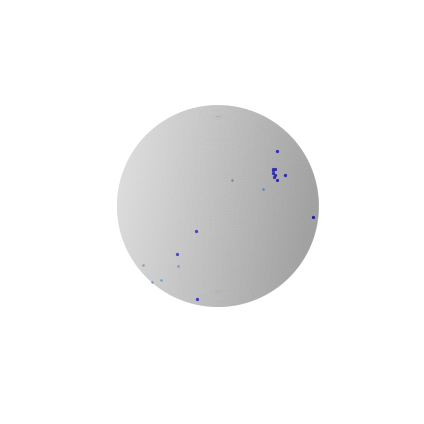

In [67]:
ra_array  = np.array(ra_array)
dec_array = np.array(dec_array)
coordinates_array = np.column_stack( (ra_array, dec_array) )

#for i in range(0, len(coordinates_array) ):
#    print( coordinates_array[i], ra_array[i] )

alma2020sg = MST_new(coordinates_array)


data_id = 10
print( alma2020sg.separations[data_id] )

alma2020sg.get_nearest(data_id)

alma2020sg.get_MST()

print(alma2020sg.link_length_list, '\n' )

print(alma2020sg.data_group.links )

alma2020sg.plot_MST()

#alma2020sg = MST_sphere(ra_array, dec_array)
#alma2020sg.find_nearest(length_threshold=10)
#print( alma2020sg.nearest_id )
#print( alma2020sg.nearest_length )

#alma2020sg.plot_points()

In [15]:
print(np.pi)

data = [False, False, False]
not any(data)

3.141592653589793


True

In [16]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(a ** 2)

[1 4 9]


In [17]:
for i in range(0, 10):
    print (i)

0
1
2
3
4
5
6
7
8
9
